In [6]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

with open("../simulation.json", "r") as f:
    data = json.load(f)

results = [
    {
        "treePropagationChance": sim["treePropagationChance"],
        "firePropagationChance": sim["firePropagationChance"],
        "ratioBurningSimulation": sim["ratioBurningSimulation"]
    }
    for sim in data["simulations"]
]
df = pd.DataFrame(results)


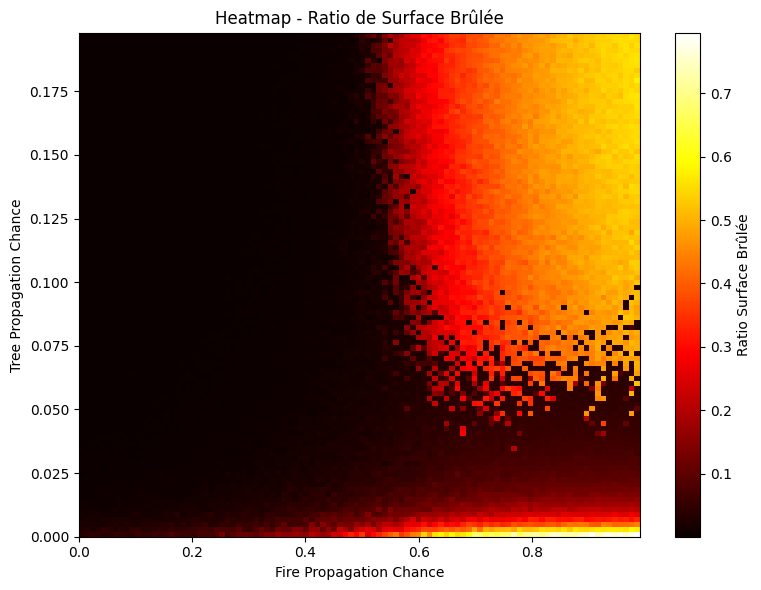

In [7]:
pivot = df.pivot(index="treePropagationChance", columns="firePropagationChance", values="ratioBurningSimulation")

plt.figure(figsize=(8, 6))
plt.imshow(pivot, origin="lower", aspect="auto", cmap="hot",
           extent=[
               df["firePropagationChance"].min(), df["firePropagationChance"].max(),
               df["treePropagationChance"].min(), df["treePropagationChance"].max()
           ])
plt.colorbar(label="Ratio Surface Brûlée")
plt.title("Heatmap - Ratio de Surface Brûlée")
plt.xlabel("Fire Propagation Chance")
plt.ylabel("Tree Propagation Chance")
plt.tight_layout()
plt.show()


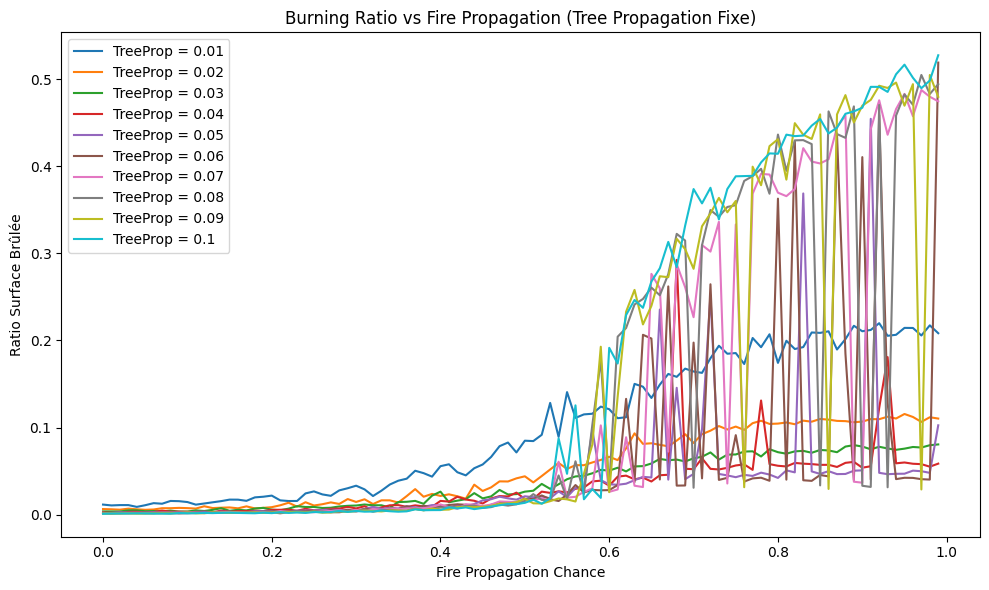

In [11]:
plt.figure(figsize=(10, 6))
fixed_tree_values = [0.01, 0.02, 0.03, 0.04, 0.05,0.06, 0.07, 0.08, 0.09, 0.1]
for tpc in fixed_tree_values:
    subset = df[df["treePropagationChance"] == tpc]
    plt.plot(subset["firePropagationChance"], subset["ratioBurningSimulation"], label=f"TreeProp = {tpc}")

plt.title("Burning Ratio vs Fire Propagation (Tree Propagation Fixe)")
plt.xlabel("Fire Propagation Chance")
plt.ylabel("Ratio Surface Brûlée")
plt.legend()
plt.tight_layout()
plt.show()


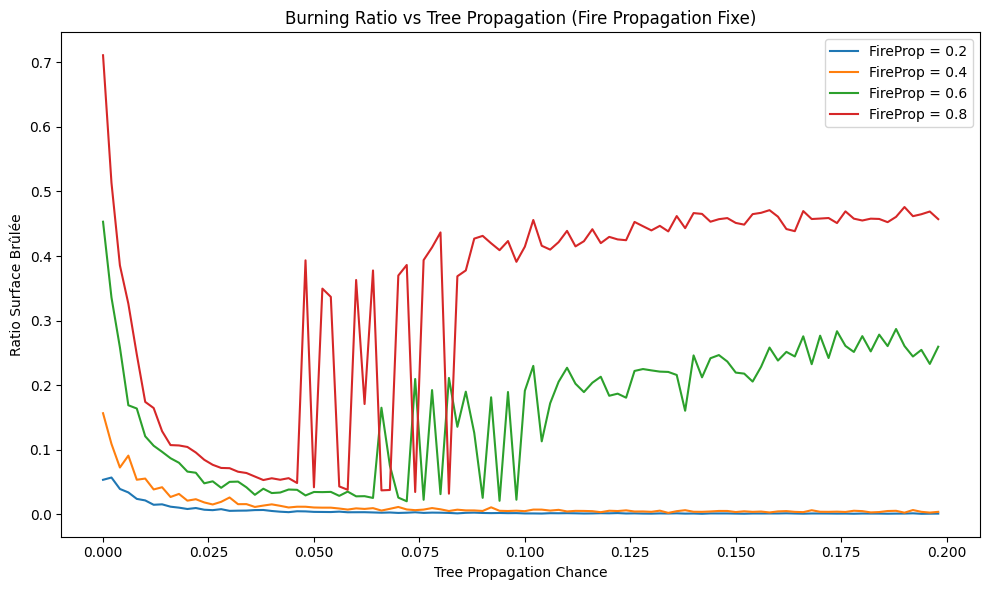

In [9]:
plt.figure(figsize=(10, 6))
fixed_fire_values = [0.2, 0.4, 0.6, 0.8]
for fpc in fixed_fire_values:
    subset = df[df["firePropagationChance"] == fpc]
    plt.plot(subset["treePropagationChance"], subset["ratioBurningSimulation"], label=f"FireProp = {fpc}")

plt.title("Burning Ratio vs Tree Propagation (Fire Propagation Fixe)")
plt.xlabel("Tree Propagation Chance")
plt.ylabel("Ratio Surface Brûlée")
plt.legend()
plt.tight_layout()
plt.show()
